In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("income.csv")

In [3]:
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lb = LabelEncoder()

In [6]:
data["Name"] = lb.fit_transform(data["Name"])

In [7]:
data

,Name,Age,Income($)
0,18,27,70000
1,13,29,90000
2,14,29,61000
3,10,28,60000
4,12,42,150000
5,9,39,155000
6,6,41,160000
7,2,38,162000
8,5,36,156000
9,3,35,130000


In [8]:
data.fillna(0)

,Name,Age,Income($)
0,18,27,70000
1,13,29,90000
2,14,29,61000
3,10,28,60000
4,12,42,150000
5,9,39,155000
6,6,41,160000
7,2,38,162000
8,5,36,156000
9,3,35,130000


In [9]:
data.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

Text(0, 0.5, 'Income')

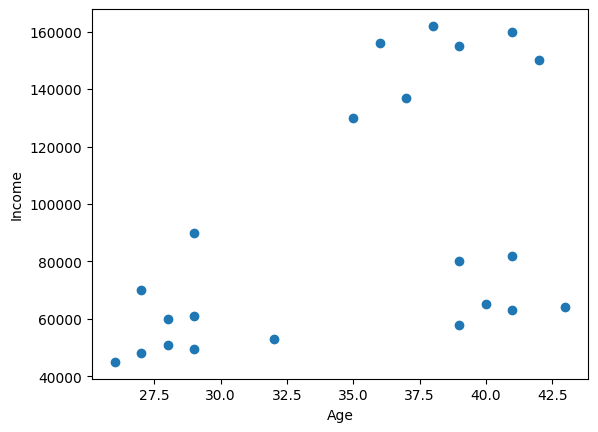

In [10]:
plt.scatter(data["Age"],data["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters = 3)

In [14]:
y_predicted=km.fit_predict(data[["Age","Income($)"]])

In [15]:
data['cluster'] = y_predicted 
data.head()

,Name,Age,Income($),cluster
0,18,27,70000,0
1,13,29,90000,2
2,14,29,61000,0
3,10,28,60000,0
4,12,42,150000,1


In [16]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

In [17]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2828\3609669247.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


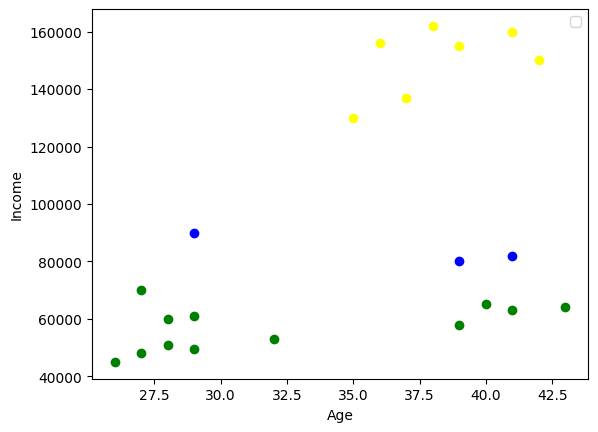

In [18]:
plt.scatter(data1["Age"],data1["Income($)"],color='green')
plt.scatter(data2["Age"],data2["Income($)"],color='yellow')
plt.scatter(data3["Age"],data3["Income($)"],color='blue')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(data[["Income($)","Age"]])

MinMaxScaler()

In [21]:
data[["Income($)","Age"]] = scaler.transform(data[["Income($)","Age"]])

In [22]:
data.head()

,Name,Age,Income($),cluster
0,18,0.058824,0.213675,0
1,13,0.176471,0.384615,2
2,14,0.176471,0.136752,0
3,10,0.117647,0.128205,0
4,12,0.941176,0.897436,1


In [23]:
km = KMeans(n_clusters=3)

In [24]:
y_predicted = km.fit_predict(data[["Age","Income($)"]])

In [25]:
y_predicted


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [26]:
data["cluster"] = y_predicted

In [27]:
data.head()

,Name,Age,Income($),cluster
0,18,0.058824,0.213675,1
1,13,0.176471,0.384615,1
2,14,0.176471,0.136752,1
3,10,0.117647,0.128205,1
4,12,0.941176,0.897436,0


In [28]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [29]:
data1 = data[data["cluster"]==0]
data2 = data[data["cluster"]==1]
data3 = data[data["cluster"]==2]

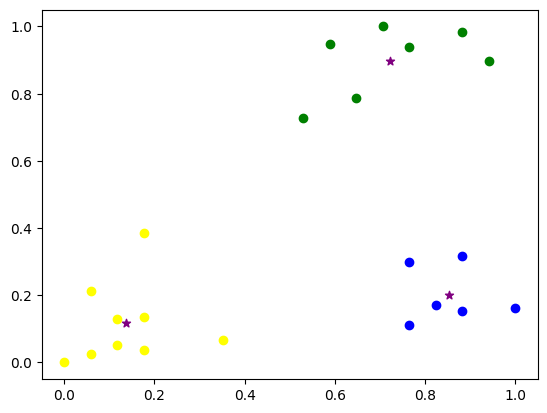

In [30]:
plt.scatter(data1["Age"],data1["Income($)"],color="green")
plt.scatter(data2["Age"],data2["Income($)"],color="yellow")
plt.scatter(data3["Age"],data3["Income($)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*")

In [31]:
sse = []
krng = range(1,10)
for i in krng:
    km = KMeans(n_clusters=i)
    km.fit(data[["Age","Income($)"]])
    sse.append(km.inertia_)


In [32]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.36348224386848604,
 0.25059969569939866,
 0.1685851223602976,
 0.15680194058776267,
 0.1205391436460109]

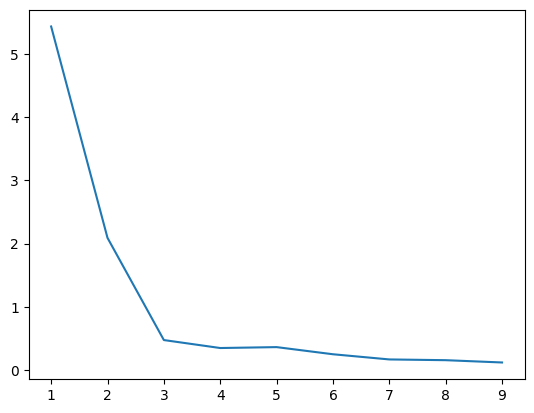

In [33]:
plt.plot(krng,sse)